## Operationalizations of multi-level polarization measure afforded by ResIN

In [1]:
import pandas as pd
import numpy as np
from typing import List, Dict, Any

from src.build_network import ResIN
import networkx as nx

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
from adjustText import adjust_text

import yaml
with open("../../src/configs.yml", "r") as configs:
    configs = yaml.safe_load(configs)

ROOTPATH = configs["ROOTPATH"]
ROOTPATH2 = configs["ROOTPATH2"]
OUTPATH = "../../output/results-summary-092924/"

print(configs)

{'ROOTPATH': '/Users/yijingch/Documents/GITHUB/broken-egg-polarization/', 'GITHUBPATH': '/Users/yijingch/Documents/GITHUB/', 'ROOTPATH2': '/Users/yijingch/Dropbox/CSS 2023 Attitude Networks/ANES/Cumulative'}


In [2]:
anes_all = pd.read_csv(ROOTPATH + "data/anes_out_092924.csv").drop(columns=["Unnamed: 0"])
YEARS = [2000, 2004, 2008, 2012, 2016, 2020]
anes_all = anes_all[anes_all["year"].isin(YEARS)]
anes_all["ft_rep_net"] = anes_all["ft_rep"] - anes_all["ft_dem"] # compute the net value of ft rep/dem
anes_all = anes_all[anes_all["dem_rep_7"].notna()]
anes_all.head()
len(anes_all)

23651

In [3]:
NODE_COLS = ["spend_serv", "gov_health", "guar_jobs", "abort", "aid_black"]

COV_COLS = ["dem_rep_7"]

## Network level 

In [4]:
from src.polar_measures import get_modularity, get_diameter, get_pol_distance
from src.polar_measures import get_linearization, get_binary_comm, get_assortativity
from src.polar_measures import get_density_weighted

In [5]:
lin_ls_bstr = {}
des_ls_bstr = {}
dem_des_ls_bstr = {}
rep_des_ls_bstr = {}

comm_attr = COV_COLS[0]
nruns = 200

for year in YEARS:
    lin_ls_bstr[year] = []
    des_ls_bstr[year] = []
    rep_des_ls_bstr[year] = []
    dem_des_ls_bstr[year] = []

    print("processing:", year)
    for r in range(nruns):
        print("- run:", r)
        anes_year_bstr = anes_all[anes_all["year"]==year].sample(frac=.8, replace=False).copy()
        anes_year_bstr = anes_year_bstr[NODE_COLS + COV_COLS]
        resin = ResIN(df=anes_year_bstr, node_cols=NODE_COLS)
        resin.make_graph(square_corr=False, remove_nan=True)
        resin.compute_covariates(covariate_cols=COV_COLS)
        resin.adjust_coordinates()
        resin.set_edge_distance()

        comms = get_binary_comm(resin, comm_attr, cutting_point=4)
        rep_subg = nx.subgraph(resin.g, comms[0])
        dem_subg = nx.subgraph(resin.g, comms[1])

        lin = get_linearization(resin)
        des = get_density_weighted(resin.g, weight_col="weight")
        rep_des = get_density_weighted(rep_subg, weight_col="weight")
        dem_des = get_density_weighted(dem_subg, weight_col="weight")   

        lin_ls_bstr[year].append(lin)
        des_ls_bstr[year].append(des)
        rep_des_ls_bstr[year].append(rep_des)
        dem_des_ls_bstr[year].append(dem_des)

# for five items it's going to take ~ 5m31s

processing: 2000
- run: 0
- run: 1
- run: 2
- run: 3
- run: 4
- run: 5
- run: 6
- run: 7
- run: 8
- run: 9
- run: 10
- run: 11
- run: 12
- run: 13
- run: 14
- run: 15
- run: 16
- run: 17
- run: 18
- run: 19
- run: 20
- run: 21
- run: 22
- run: 23
- run: 24
- run: 25
- run: 26
- run: 27
- run: 28
- run: 29
- run: 30
- run: 31
- run: 32
- run: 33
- run: 34
- run: 35
- run: 36
- run: 37
- run: 38
- run: 39
- run: 40
- run: 41
- run: 42
- run: 43
- run: 44
- run: 45
- run: 46
- run: 47
- run: 48
- run: 49
- run: 50
- run: 51
- run: 52
- run: 53
- run: 54
- run: 55
- run: 56
- run: 57
- run: 58
- run: 59
- run: 60
- run: 61
- run: 62
- run: 63
- run: 64
- run: 65
- run: 66
- run: 67
- run: 68
- run: 69
- run: 70
- run: 71
- run: 72
- run: 73
- run: 74
- run: 75
- run: 76
- run: 77
- run: 78
- run: 79
- run: 80
- run: 81
- run: 82
- run: 83
- run: 84
- run: 85
- run: 86
- run: 87
- run: 88
- run: 89
- run: 90
- run: 91
- run: 92
- run: 93
- run: 94
- run: 95
- run: 96
- run: 97
- run: 98
- r

## Network level

### Linearization

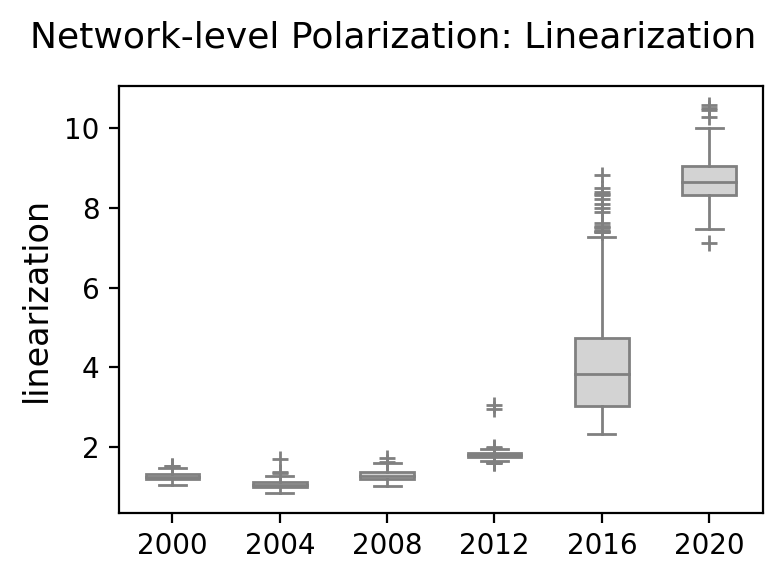

In [6]:
fig,ax = plt.subplots(figsize=(4,3))
bp_lin = ax.boxplot(lin_ls_bstr.values(), sym="+", patch_artist=True)
ax.set_xticks(range(1,7), YEARS)
for item in ["boxes", "whiskers", "fliers", "medians", "caps"]:
        plt.setp(bp_lin[item], color="grey")
        if item =="boxes":
            for patch in bp_lin[item]:
                patch.set_facecolor("lightgrey")
plt.setp(bp_lin["fliers"], markeredgecolor="grey")
ax.set_ylabel("linearization", fontsize=12)
plt.suptitle("Network-level Polarization: Linearization", fontsize=13, y=.95)
plt.tight_layout()
plt.savefig(OUTPATH + "network-level-polar-linearization.pdf", dpi=300, bbox_inches="tight")

### Link density

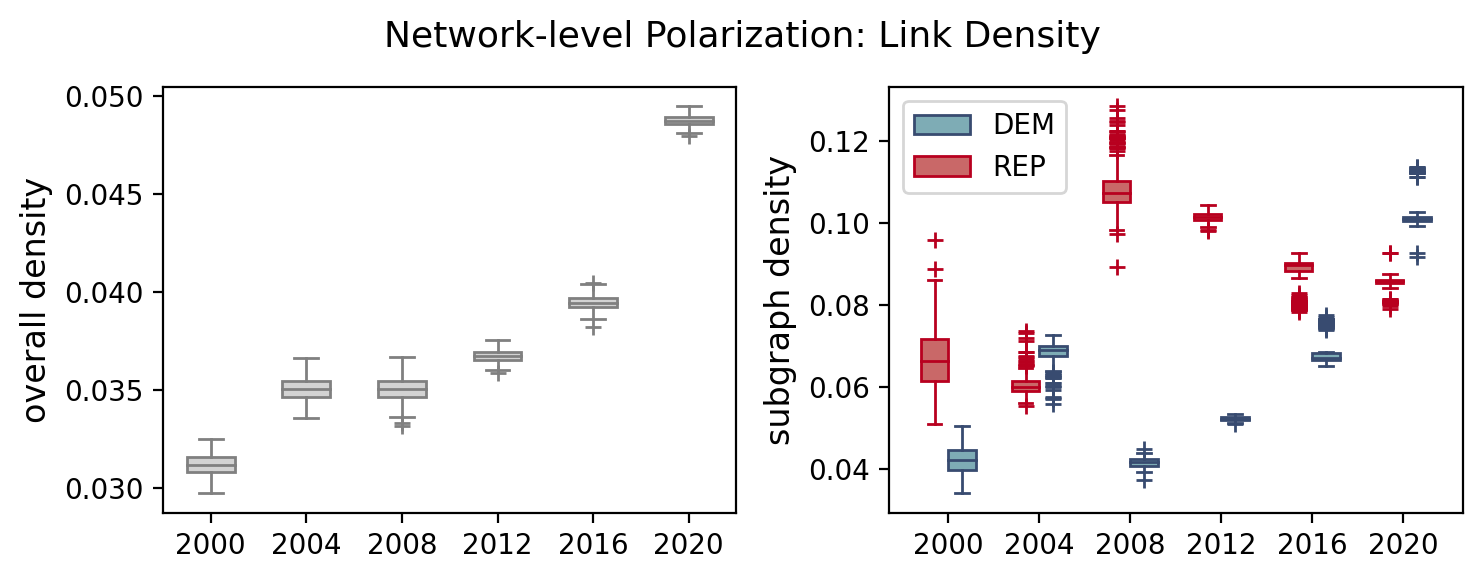

In [7]:
fig,ax = plt.subplots(ncols=2, figsize=(7.5,3))

bp_all = ax[0].boxplot(des_ls_bstr.values(), sym="+", patch_artist=True)
ax[0].set_ylabel("overall density", fontsize=12)

bp_rep = ax[1].boxplot(rep_des_ls_bstr.values(), positions=np.arange(1,7)-.15, sym="+", widths=.3, patch_artist=True)
bp_dem = ax[1].boxplot(dem_des_ls_bstr.values(), positions=np.arange(1,7)+.15, sym="+", widths=.3, patch_artist=True)
ax[1].set_ylabel("subgraph density", fontsize=12)


for item in ["boxes", "whiskers", "fliers", "medians", "caps"]:
        plt.setp(bp_all[item], color="grey")
        plt.setp(bp_dem[item], color="#384B70")
        plt.setp(bp_rep[item], color="#B8001F")
        if item =="boxes":
            for patch in bp_all[item]:
                patch.set_facecolor("lightgrey")
            for patch in bp_rep[item]:
                patch.set_facecolor("#C96868")
            for patch in bp_dem[item]:
                patch.set_facecolor("#7EACB5")

plt.setp(bp_all["fliers"], markeredgecolor="grey")
plt.setp(bp_dem["fliers"], markeredgecolor="#384B70")
plt.setp(bp_rep["fliers"], markeredgecolor="#B8001F")

ax[1].legend([bp_dem["boxes"][1], bp_rep["boxes"][1]], ["DEM", "REP"])

for i in range(2):
    ax[i].set_xticks(range(1,7), YEARS)
plt.suptitle("Network-level Polarization: Link Density", fontsize=13, y=.95)
plt.tight_layout()
plt.savefig(OUTPATH + "network-level-polar-link-density.pdf", dpi=300, bbox_inches="tight")